In [1]:
import numpy as np
from Utilities import PlotImages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os
from PIL import Image as im

In [2]:
data = np.load("/work/MA490_DeepLearning/Share/Dice/CleanedDiceData64.npz", allow_pickle=True)

In [3]:
images = data["images"]
labels = data["labels"]

In [4]:
labels

array(['d6,1', 'd12,5', 'd20,10', ..., 'd%,6', 'd10,8', 'd10,5'],
      dtype='<U6')

In [5]:
rotatedImages = []
rotatedLabels = []
for k, die in enumerate(images):
    die90 = np.rot90(die)
    die180 = np.rot90(die90)
    die270 = np.rot90(die180)
    rotatedImages.append(die)
    rotatedImages.append(die90)
    rotatedImages.append(die180)
    rotatedImages.append(die270)
    rotatedLabels.append(labels[k])
    rotatedLabels.append(labels[k])
    rotatedLabels.append(labels[k])
    rotatedLabels.append(labels[k])

In [6]:
newImages = np.array(rotatedImages)/255.0
newLabels = np.array(rotatedLabels)
print("Num Images: ", len(newImages))

Num Images:  11072


In [7]:
newImages

array([[[[0.85882353, 0.8       , 0.7254902 ],
         [0.85490196, 0.8       , 0.72941176],
         [0.86666667, 0.80784314, 0.73333333],
         ...,
         [0.88627451, 0.82352941, 0.76078431],
         [0.88235294, 0.81960784, 0.75686275],
         [0.86666667, 0.8       , 0.72941176]],

        [[0.87058824, 0.80784314, 0.74509804],
         [0.85490196, 0.78823529, 0.71372549],
         [0.85098039, 0.78431373, 0.70980392],
         ...,
         [0.8745098 , 0.81176471, 0.74901961],
         [0.86666667, 0.8       , 0.72156863],
         [0.86666667, 0.8       , 0.72156863]],

        [[0.85882353, 0.8       , 0.7254902 ],
         [0.85098039, 0.78823529, 0.71764706],
         [0.87058824, 0.80392157, 0.73333333],
         ...,
         [0.87843137, 0.81176471, 0.74117647],
         [0.86666667, 0.8       , 0.71764706],
         [0.86666667, 0.8       , 0.72156863]],

        ...,

        [[0.85098039, 0.79607843, 0.74901961],
         [0.85098039, 0.79215686, 0.73333333]

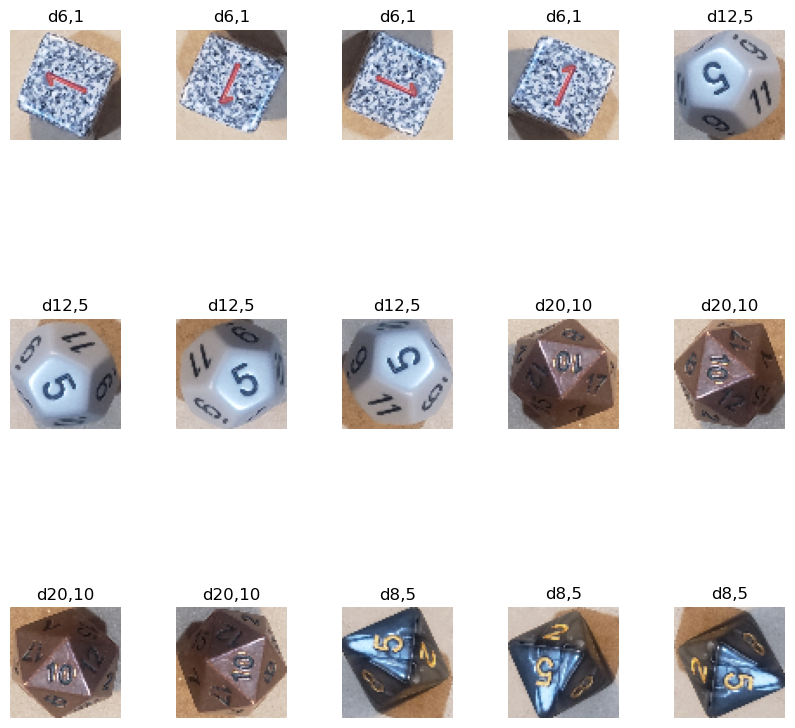

In [8]:
PlotImages(0, 15, 3, 5, newImages, newLabels)
plt.show()

In [9]:
np.savez_compressed('./RotatedDiceImages64pix.npz',
                    images=newImages,
                    labels=newLabels)